In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the Dataset
data = pd.read_csv('housing.csv')

In [4]:
data.dropna(inplace=True)

In [5]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [6]:
from sklearn.model_selection import train_test_split

x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [7]:
train_data = x_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
13131,-121.30,38.25,27.0,2475.0,548.0,1703.0,517.0,2.5727,INLAND,86100.0
10119,-117.92,33.94,30.0,2506.0,394.0,1255.0,421.0,4.7813,<1H OCEAN,198200.0
18349,-122.17,37.43,24.0,3924.0,1142.0,7174.0,950.0,4.0972,NEAR OCEAN,387500.0
17758,-121.80,37.35,17.0,2529.0,423.0,1756.0,429.0,5.1017,<1H OCEAN,240700.0
8410,-118.35,33.93,33.0,2040.0,576.0,2649.0,561.0,2.3375,<1H OCEAN,170600.0
...,...,...,...,...,...,...,...,...,...,...
8864,-118.39,34.06,43.0,1879.0,397.0,873.0,382.0,3.8158,<1H OCEAN,500001.0
20459,-118.77,34.28,26.0,2873.0,480.0,1915.0,475.0,5.3681,<1H OCEAN,187700.0
11721,-120.08,39.23,19.0,1746.0,306.0,251.0,104.0,4.8182,INLAND,146900.0
20154,-119.19,34.46,39.0,2056.0,381.0,939.0,371.0,6.6257,<1H OCEAN,427600.0


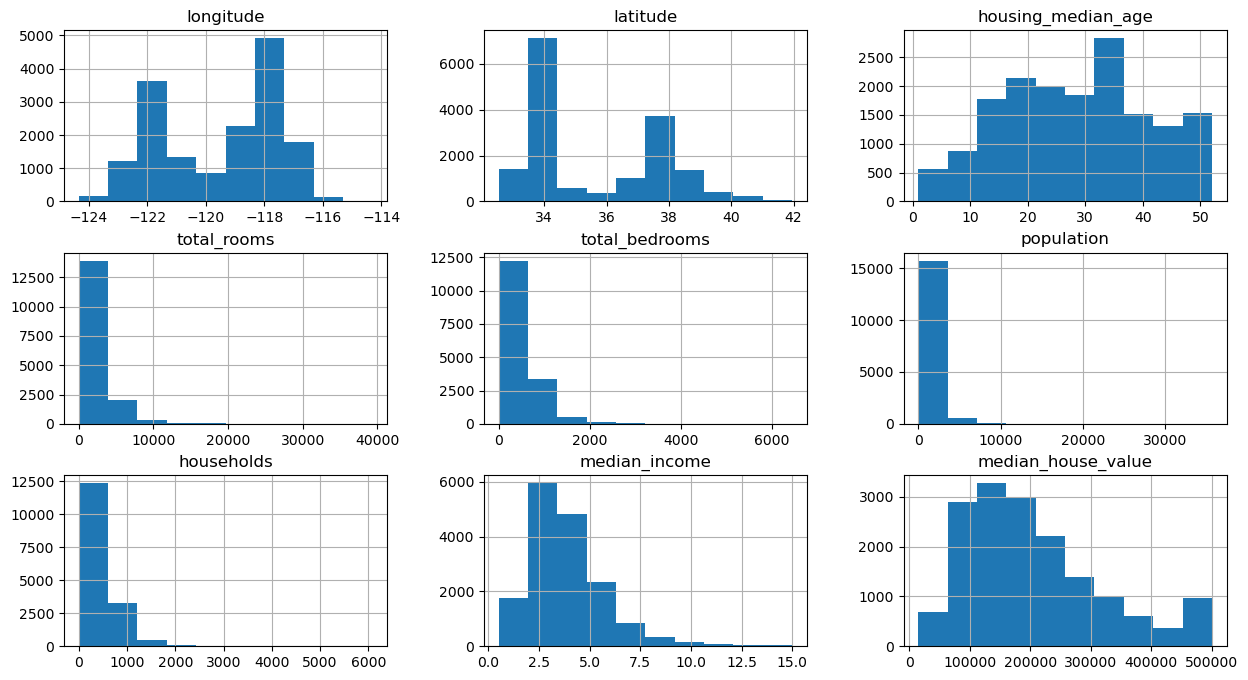

In [8]:
train_data.hist(figsize=(15,8))
plt.show()

<Axes: >

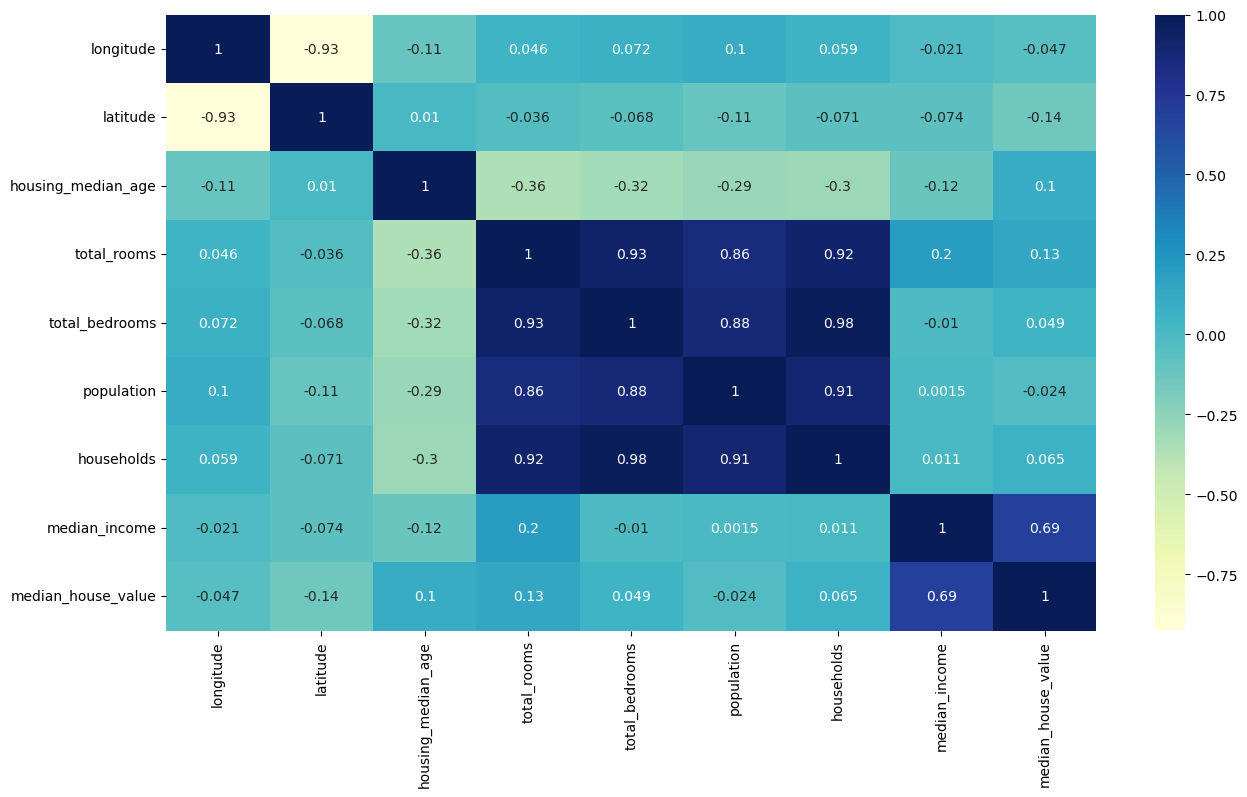

In [9]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

In [10]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

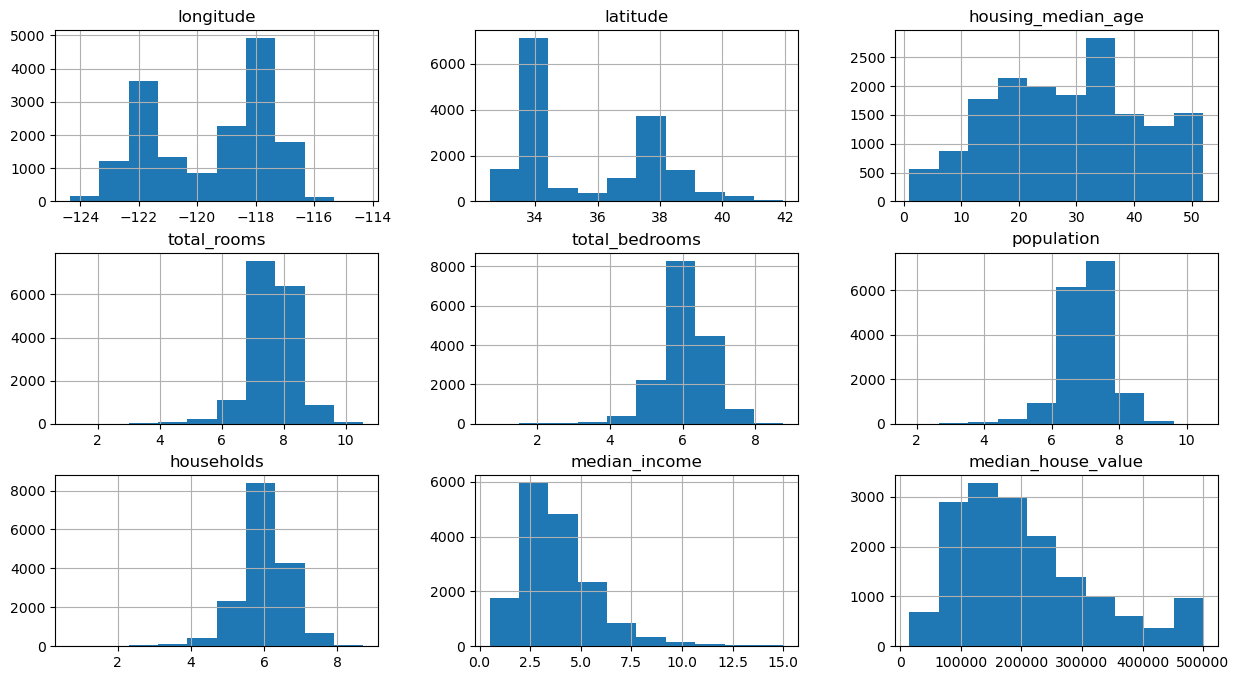

In [12]:
train_data.hist(figsize=(15,8))
plt.show()

In [18]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

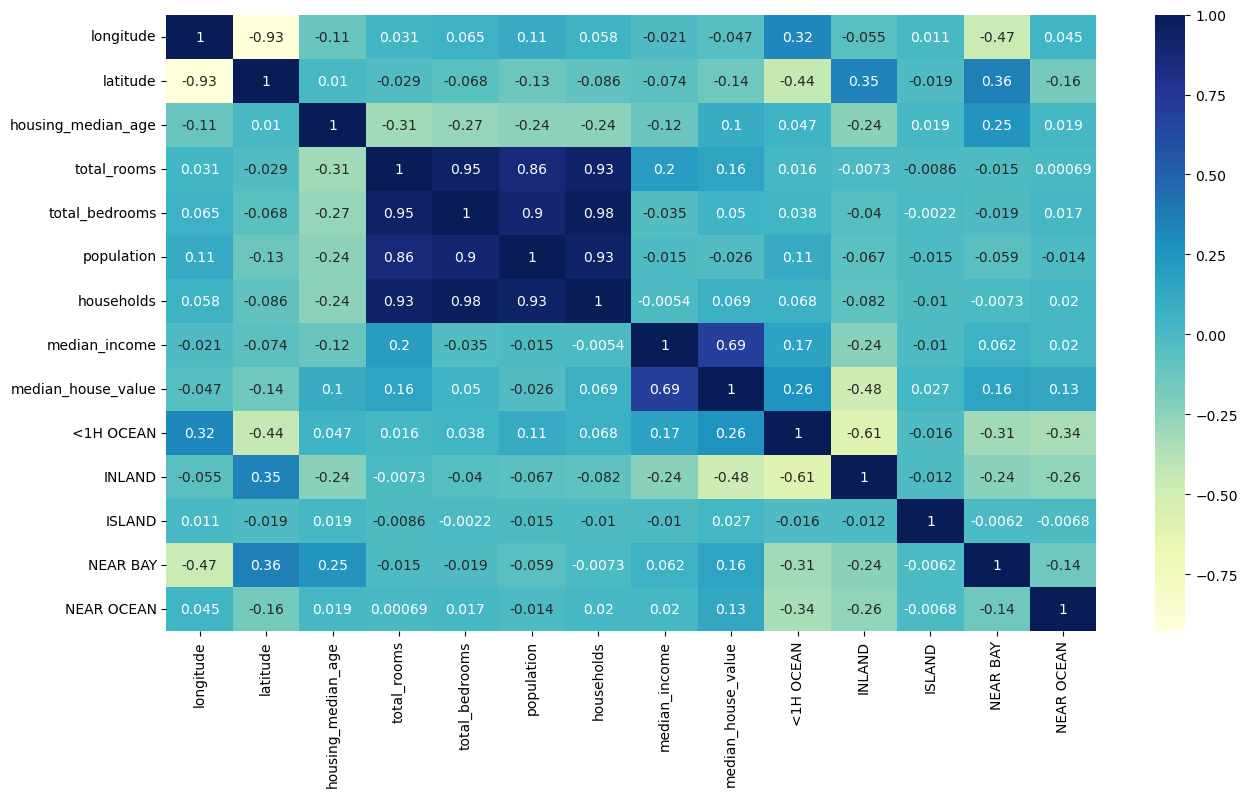

In [23]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')
plt.show()

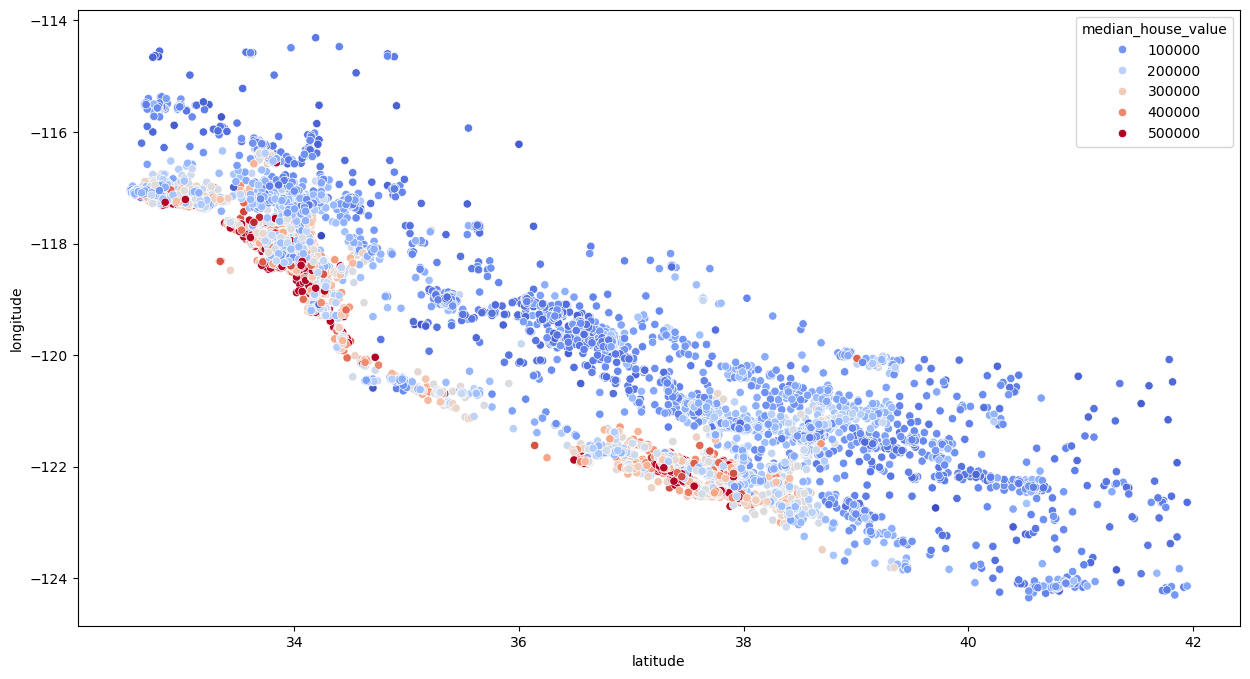

In [22]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')
plt.show()

In [24]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

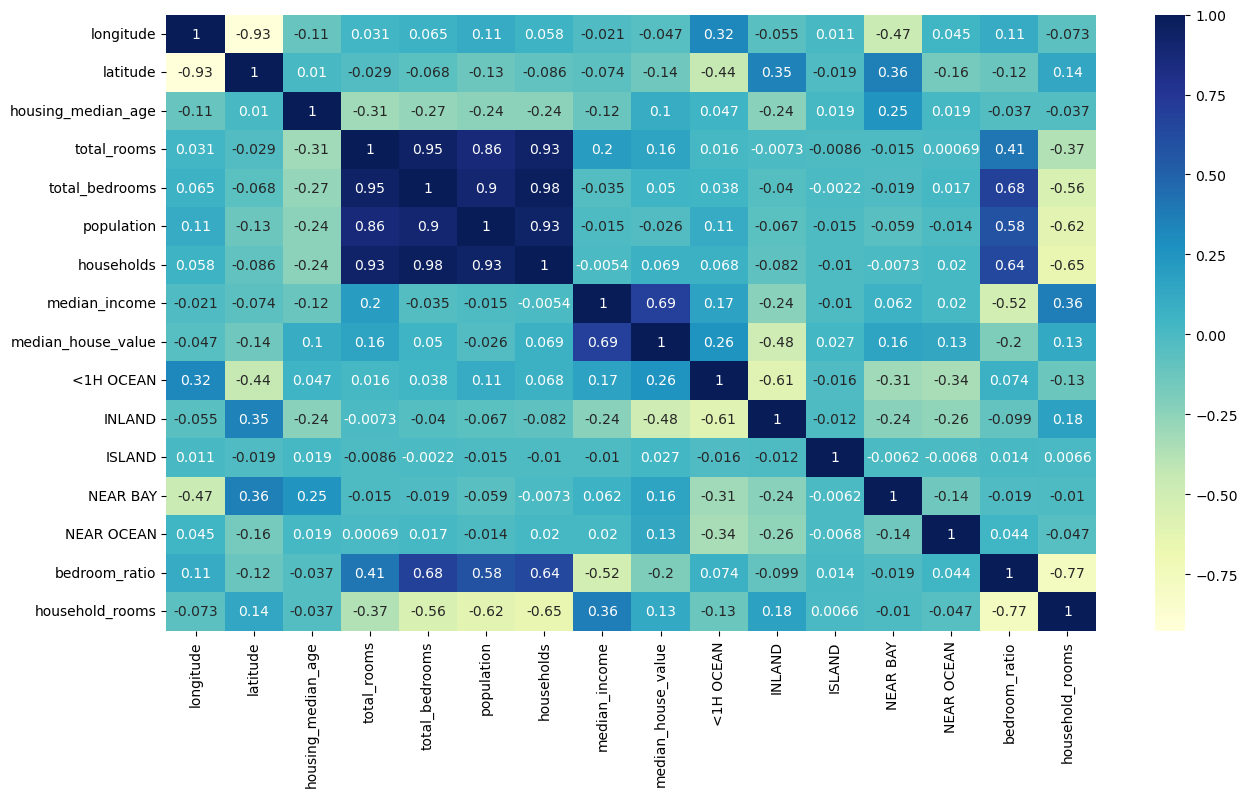

In [25]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')
plt.show()